# Iris Flower Classification

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#delete id column from the data
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# display the number of sample of each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Preprocessing the dataset

In [8]:
# checking null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Exploratory Data Analysis (EDA)

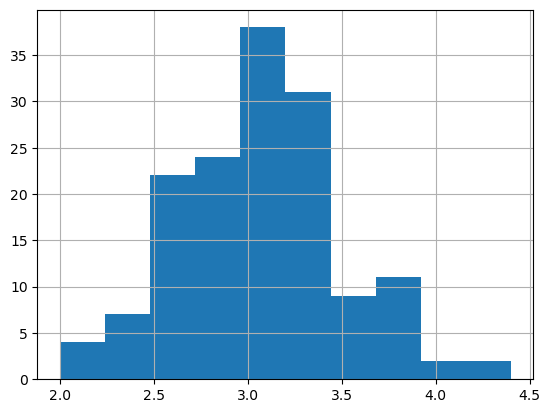

In [10]:
df['SepalWidthCm'].hist() #hisogram
plt.show()

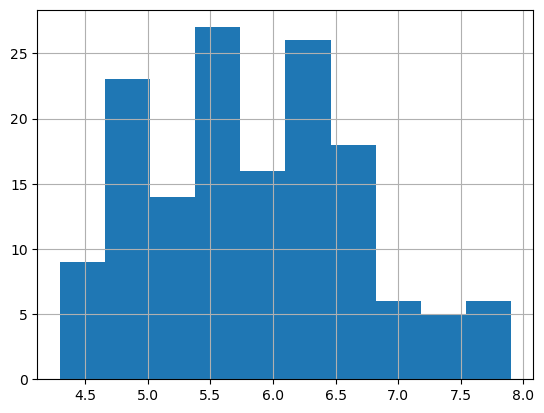

In [11]:
df['SepalLengthCm'].hist() #hisogram
plt.show()

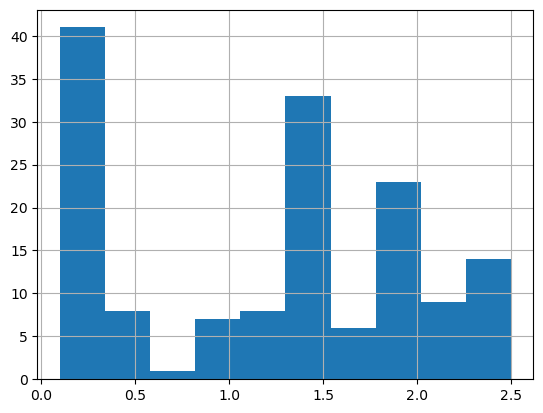

In [12]:
df['PetalWidthCm'].hist() #hisogram
plt.show()

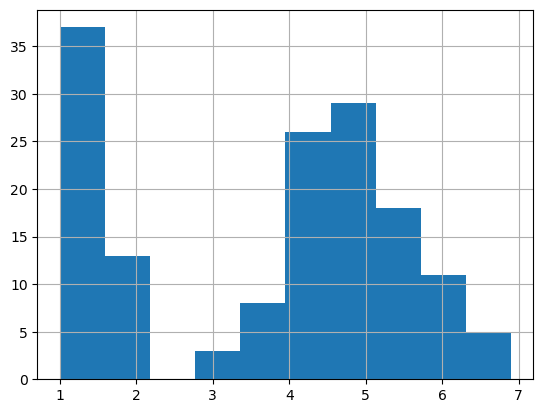

In [13]:
df['PetalLengthCm'].hist() #hisogram
plt.show()

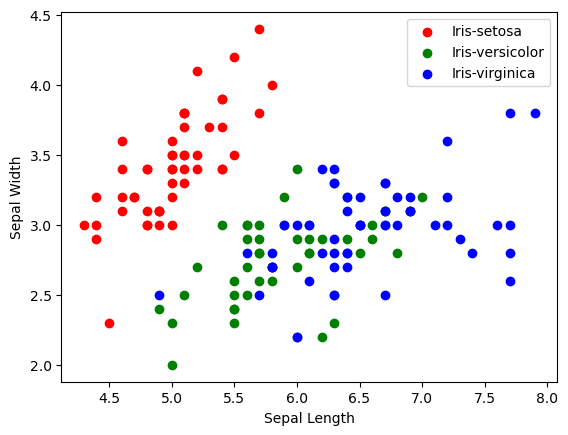

In [22]:
# creating a scatterplot
colors = ['red', 'green', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    x = df[df['Species'] == species[i]]
    #print(x)
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

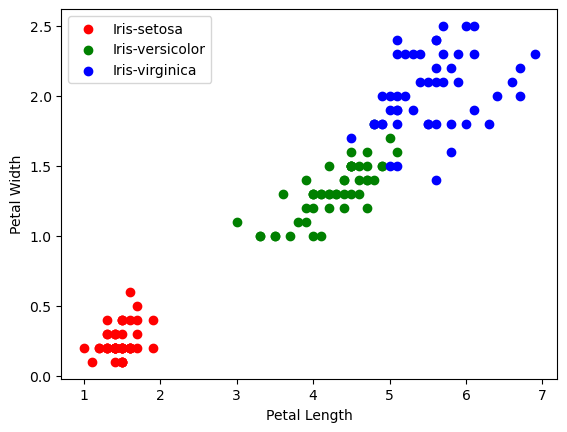

In [23]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    #print(x)
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

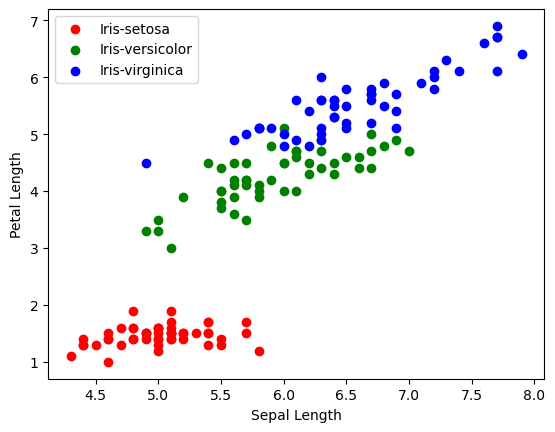

In [24]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    #print(x)
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

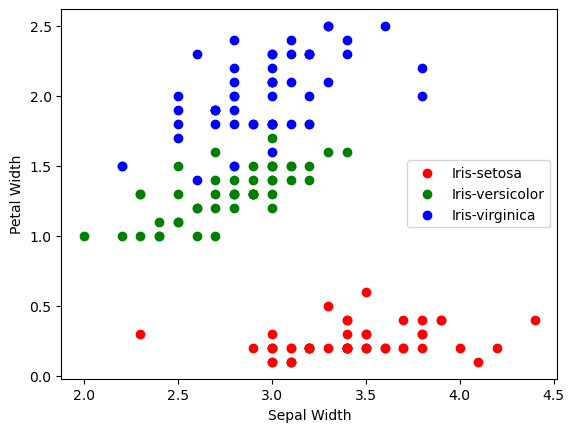

In [25]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    #print(x)
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

#### Coorelation Matrix

In [26]:
# showing correlation coefficients between variables
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


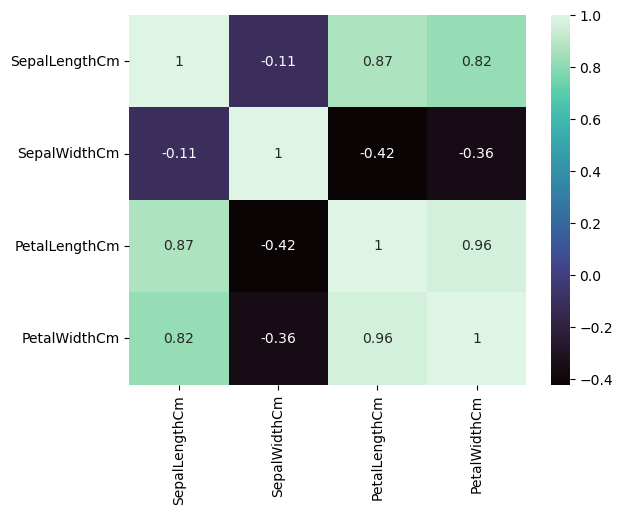

In [27]:
# heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='mako')
plt.show()

#### Training a Model

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
# training model
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# model accuracy
print("Accuracy : ", model.score(X_test, y_test) * 100)

Accuracy :  95.55555555555556


In [38]:
model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)

#### KNN Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [33]:
# training model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
# model accuracy
print("Accuracy : ", model.score(X_test, y_test) * 100)

Accuracy :  95.55555555555556


In [35]:
model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)

You can find this project on <a href="https://github.com/Vyas-Rishabh/Iris-Flower-Classification---Oasis-Infobyte"><b>GitHub.</b></a>